In [1]:
from nlpy.analysis import Analaysis
from manager import DBManager
from model import tweetModel
from gensim.models import Word2Vec



In [2]:
# 0.통일& 남북정상회담 관련 트위터 크롤링하기 2018-04-01-00:00:00
# cd crawler
# python3 tweetCrawler.py 남북정상회담 2018-04-01-00:00:00
# python3 tweetCrawler.py 통일 2018-04-01-00:00:00


# 1.크롤링한 트위터 정보에서 실제 남북 통일과 관련된 글만을 추려내기위해 word2Vecotr로 통일 관련 단어들 추출해내기
tweets = tweetModel.getAllTweets()
tokenized_contents = []
a = Analaysis()
for item in tweets:
    tweet_text = item["textt"]
    tokenized_contents.append(a.getNounsList(tweet_text,1))
# print(tokenized_contents)


[['통일감', '행복'], ['안녕', '안녕하세', '하세', '탐라조사', '조사', '주신', '소소한', '소한', '간식', '간식거리', '거리', '국어', '수행', '수행평가', '평가', '상업적', '용도', '북한', '북한과의', '과의', '통일'], ['단색', '그림자', '레이어', '속성', '멀티', '멀티플라이', '플라이', '피부', '머리카락', '색조', '명도', '통일', '추가', '원본', '채색', '클린업', '클린업그림', '그림', '오버레이', '어둠', '부위별', '발견', '조절', '대비'], ['외교', '통일', '국방'], ['저기', '통일', '올리', '고요', '처음', '시작', '다음', '비아', '우리', '예명', '실트', '아이', '취급', '불쾌'], ['사전', '사전투표', '투표', '선거', '선거당일', '당일', '인생', '아들', '민주', '민주주의', '주의', '장국', '경기', '경기도', '경기도지사', '지사', '치열', '토론', '토론끝', '민주당', '의견', '통일', '남경', '남경필후보', '후보'], ['정동', '정동영', '호의적', '이상', '관악', '보선', '총선', '불확실', '파파이스', '파이스', '정동영', '동영', '이미지', '세탁', '뉴스', '뉴스공장', '공장', '통일', '문제', '핑계', '새끼', '의심', '수상'], ['국어', '수행', '수행평가때문', '평가', '때문', '투표', '감사', '북한', '남한', '통일', '생각'], ['문재', '문재인과', '인과', '문위병', '위병', '통일', '실업', '실업난', '폐업', '폐업난'], ['학교', '과제', '설문', '설문조사', '조사', '한번', '참여', '알티', '부탁', '휴대폰', '충전기', '종류', '하나', '통일', '타입', '앞뒤', '구분', '2.5', '보통', '

In [19]:
model = Word2Vec(tokenized_contents, size=100, window=5, min_count=1, workers=4)
# mostSimilar=> 코사인유사도를 측정해줌 => 백터간 거리
# 두 벡터의 방향을 보는데 그방향이 완전이 같으면 1 다르면-1을 낸다. 
meaning_word = model.wv.most_similar(positive=["통일"], topn=10033)
# print(model)
print(meaning_word)
# words = list(model.wv.vocab)
# print(words)
# print(model['통일'])
# model.save('model.bin')
# load model
# new_model = Word2Vec.load('model.bin')
# print(new_model)

[('우리', 0.9994252920150757), ('평화', 0.9993934035301208), ('북한', 0.9991145133972168), ('한국', 0.9988938570022583), ('한반도', 0.9988901019096375), ('국민', 0.9988870620727539), ('세계', 0.9987238645553589), ('남북', 0.9986469745635986), ('사람', 0.9984836578369141), ('오늘', 0.9983295202255249), ('뉴스', 0.9983220100402832), ('회담', 0.9982041716575623), ('국가', 0.9982001781463623), ('대통령', 0.9981738328933716), ('미국', 0.9981595873832703), ('선언', 0.9980758428573608), ('정부', 0.9980007410049438), ('판문점', 0.9979660511016846), ('시작', 0.9977700710296631), ('경제', 0.9976902008056641), ('자유', 0.9976580142974854), ('10', 0.9975982308387756), ('나라', 0.997596025466919), ('시간', 0.9975849390029907), ('정상', 0.9975055456161499), ('정상회담', 0.997387170791626), ('민주당', 0.9973308444023132), ('비핵화', 0.9972822666168213), ('남북정상회담', 0.9971226453781128), ('일본', 0.9970860481262207), ('생각', 0.9970793724060059), ('평양', 0.9970583915710449), ('다음', 0.9969089031219482), ('트럼프', 0.9968776106834412), ('지금', 0.9968562126159668), ('선거', 0.

/Users/yenos/Developer_Web/unification_isnt_it/env/lib/python3.5/site-packages/ipykernel/__main__.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


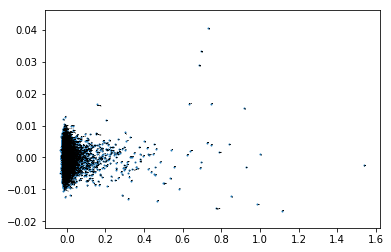

<Figure size 432x288 with 0 Axes>

In [21]:
# OPTION 통일관련 Word2Vector 모델링 된것을 그래프로 보기
# PCA 차원축소 고차원벡터 =>처차원 
from sklearn.decomposition import PCA
from matplotlib import pyplot
import matplotlib.font_manager as fm

import matplotlib
import matplotlib.font_manager

# 한글처리를 위해 폰트 위치 찾기
# [f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
# [(f.name, f.fname) for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

# 찾은 폰트로 plot 한글표기 가능하도록 설정
path = '/Library/Fonts/NanumBarunGothic-YetHangul.ttf'
fontprop = fm.FontProperties(fname=path, size=0.5)

X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.scatter(result[:, 0], result[:, 1],1)

words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]),fontproperties=fontprop)

fig1 = pyplot.gcf()
pyplot.show()
pyplot.draw()
fig1.savefig('uni_w2c.png', dpi=2000)
    
